## Practical Work 2

For this practical work, the trainees will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [139]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import r2_score
import math


To have a dataset or set of data points, the trainee must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [140]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [127]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [3]:
X.shape=(50,1)

In [4]:
X.shape

(50, 1)

In [143]:
a=-2
b=1
y=a*X+b
y.reshape(-1,1)

array([[  1.        ],
       [  0.18367347],
       [ -0.63265306],
       [ -1.44897959],
       [ -2.26530612],
       [ -3.08163265],
       [ -3.89795918],
       [ -4.71428571],
       [ -5.53061224],
       [ -6.34693878],
       [ -7.16326531],
       [ -7.97959184],
       [ -8.79591837],
       [ -9.6122449 ],
       [-10.42857143],
       [-11.24489796],
       [-12.06122449],
       [-12.87755102],
       [-13.69387755],
       [-14.51020408],
       [-15.32653061],
       [-16.14285714],
       [-16.95918367],
       [-17.7755102 ],
       [-18.59183673],
       [-19.40816327],
       [-20.2244898 ],
       [-21.04081633],
       [-21.85714286],
       [-22.67346939],
       [-23.48979592],
       [-24.30612245],
       [-25.12244898],
       [-25.93877551],
       [-26.75510204],
       [-27.57142857],
       [-28.3877551 ],
       [-29.20408163],
       [-30.02040816],
       [-30.83673469],
       [-31.65306122],
       [-32.46938776],
       [-33.28571429],
       [-34

In [142]:
a=-2
b=1
y=a*X+b
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

### Plot X vs. y

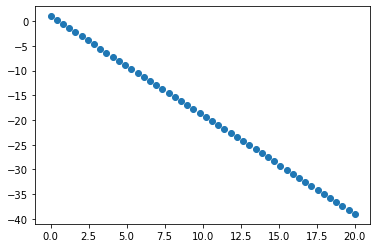

In [6]:
plt.plot(X,y,'o')

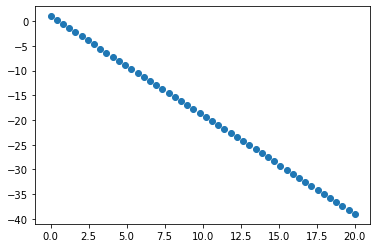

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Implement the stop criteria (Gradient Check).
#### Implement the convergence check (cost check).
#### You can use any small values for stop criteria and convergence check. However, the used values in the current implementation used 0.001 for both.

In [135]:
def GD(X,y,alpha = 0.001,max_iter=1000,grad_norm_min=0.001):
    #X =np.c_[np.ones((X.shape[0],1)),X] 
    theta_n = np.zeros((X.shape[1],1))
    theta = []
    #print(theta.shape)
    curr_iter=0
    norm_gradiant_vector= 10000000
    j_mat=[]
    while(curr_iter <= max_iter):
        #curr_theta = theta[:,-1].reshape(-1,1)
        theta.append(theta_n)
        h_x = np.dot(X,theta_n)
        #print(h_x.shape)
        Error_Vector =h_x - y
        #print(Error_Vector.shape)
        j = (np.linalg.norm(Error_Vector)**2)/(2*(Error_Vector.shape[0]))
        j_mat.append(j)

       

        d_theta = np.dot(X.transpose(),Error_Vector)/(Error_Vector.shape[0])
        #print(d_theta.shape)
        norm_gradiant_vector=np.linalg.norm(d_theta)   
        if  norm_gradiant_vector < grad_norm_min  or ((len(j_mat)>1) and (abs(j_mat[-2]-j_mat[-1]) <= 0.001)):
            
            break
        theta_n=theta_n - alpha*d_theta
        
        #print(theta_n.shape)
        #

        
        print("****************** Iteration " +str(curr_iter) + " ********************"+"\n")
        print("h(x) = " + str(h_x)+"\n")
        print("Error Vector : "+ str(Error_Vector)+"\n")
        print("j = "+str(j)+"\n")
        print("gradiant vector = " + str(d_theta)+"\n")
        print("gradiant vector norm = " + str(norm_gradiant_vector)+"\n")
        print("theta : "+str(theta[-1])+"\n")  
        curr_iter+=1
    print("****************** Training Report ********************")
    print("Gradient Descent converged after ", curr_iter-1," epochs")
    print("theta_0_Opt : ",theta[-1][0],"")
    print("theta_0_Opt : ",theta[-1][1],"")
    print("Error Vector : "+ str(Error_Vector)+"\n")
    print("h(x): y predict = " + str(h_x)+"\n")
    print("y actual: ", str(y))
    


        
    return np.array(theta).reshape((len(theta),len(theta[0]))).transpose(),j_mat 

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [144]:
X = np.linspace(0,20)
X =np.c_[np.ones((X.shape[0])),X]
X.shape

(50, 2)

In [137]:
X

array([[ 1.        ,  0.        ],
       [ 1.        ,  0.40816327],
       [ 1.        ,  0.81632653],
       [ 1.        ,  1.2244898 ],
       [ 1.        ,  1.63265306],
       [ 1.        ,  2.04081633],
       [ 1.        ,  2.44897959],
       [ 1.        ,  2.85714286],
       [ 1.        ,  3.26530612],
       [ 1.        ,  3.67346939],
       [ 1.        ,  4.08163265],
       [ 1.        ,  4.48979592],
       [ 1.        ,  4.89795918],
       [ 1.        ,  5.30612245],
       [ 1.        ,  5.71428571],
       [ 1.        ,  6.12244898],
       [ 1.        ,  6.53061224],
       [ 1.        ,  6.93877551],
       [ 1.        ,  7.34693878],
       [ 1.        ,  7.75510204],
       [ 1.        ,  8.16326531],
       [ 1.        ,  8.57142857],
       [ 1.        ,  8.97959184],
       [ 1.        ,  9.3877551 ],
       [ 1.        ,  9.79591837],
       [ 1.        , 10.20408163],
       [ 1.        , 10.6122449 ],
       [ 1.        , 11.02040816],
       [ 1.        ,

In [138]:

theta, loss_mat =GD(X,y,alpha = 0.0005,max_iter=300,grad_norm_min=0.001)

****************** Iteration 0 ********************

h(x) = [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

Error Vector : [[-1.        ]
 [-0.18367347]
 [ 0.63265306]
 [ 1.44897959]
 [ 2.26530612]
 [ 3.08163265]
 [ 3.89795918]
 [ 4.71428571]
 [ 5.53061224]
 [ 6.34693878]
 [ 7.16326531]
 [ 7.97959184]
 [ 8.79591837]
 [ 9.6122449 ]
 [10.42857143]
 [11.24489796]
 [12.06122449]
 [12.87755102]
 [13.69387755]
 [14.51020408]
 [15.32653061]
 [16.14285714]
 [16.95918367]
 [17.7755102 ]
 [18.59183673]
 [19.40816327]
 [20.2244898 ]
 [21.04081633]
 [21.85714286]
 [22.67346939]
 [23.48979592]
 [24.30612245]
 [25.12244898]
 [25.93877551]
 [26.75510204]
 [27.57142857]
 [28.3877551 ]
 [29.20408163]
 [30.02040816]
 [30.83673469]
 [31.65306122]
 [32.469

#### Calculate r2 score

In [37]:
from sklearn.metrics import r2_score

In [74]:
r2_score(y,X@theta[:,-1])

0.9975395965150151

##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

#### Plot loss vs. epochs

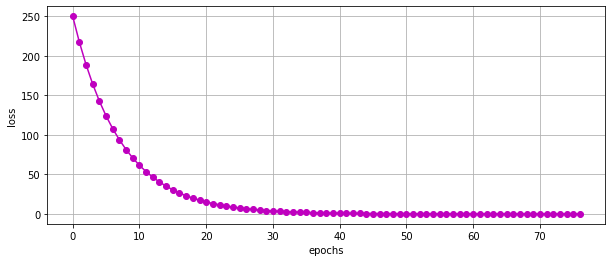

In [75]:
plt.figure(figsize=(10,4))
plt.grid()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(loss_mat,'o-',color="#BF00BF")

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

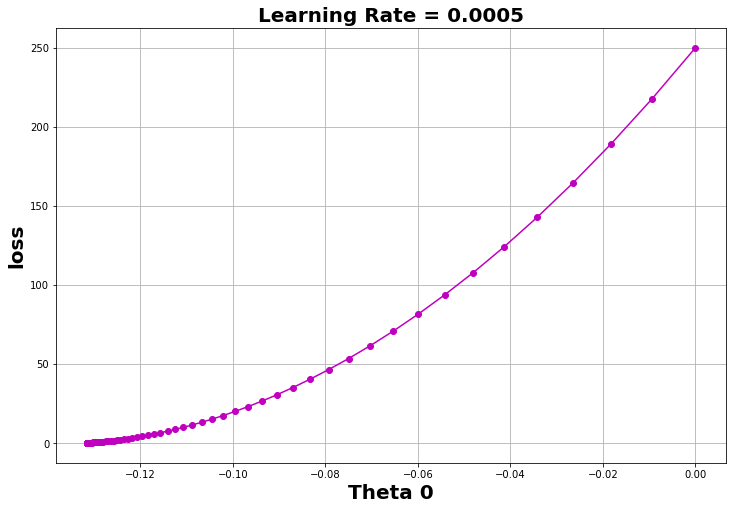

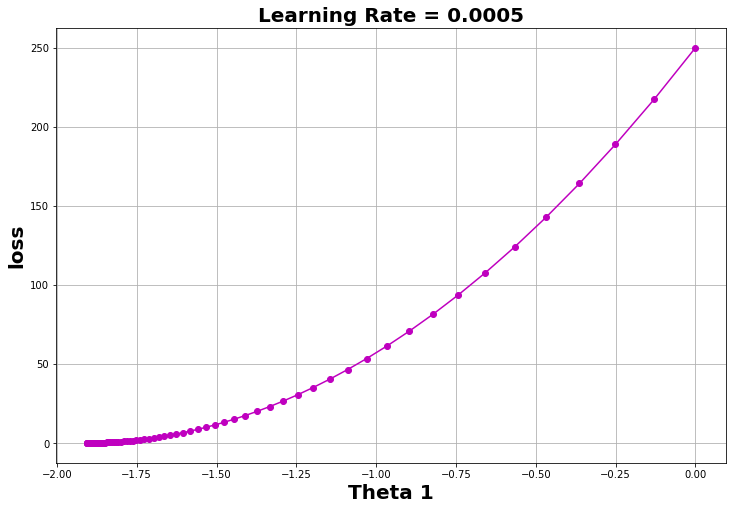

In [76]:
plt.figure(figsize=(12,8))
plt.title('Learning Rate = 0.0005', fontweight='bold',fontsize=20)
plt.grid()
plt.xlabel("Theta 0", fontweight='bold',fontsize=20)
plt.ylabel("loss", fontweight='bold',fontsize=20)
plt.plot(theta[0,:],loss_mat,'o-',color="#BF00BF")

plt.figure(figsize=(12,8))
plt.title('Learning Rate = 0.0005', fontweight='bold',fontsize=20)
plt.grid()
plt.xlabel("Theta 1", fontweight='bold',fontsize=20)
plt.ylabel("loss", fontweight='bold',fontsize=20)
plt.plot(theta[1,:],loss_mat,'o-',color="#BF00BF")

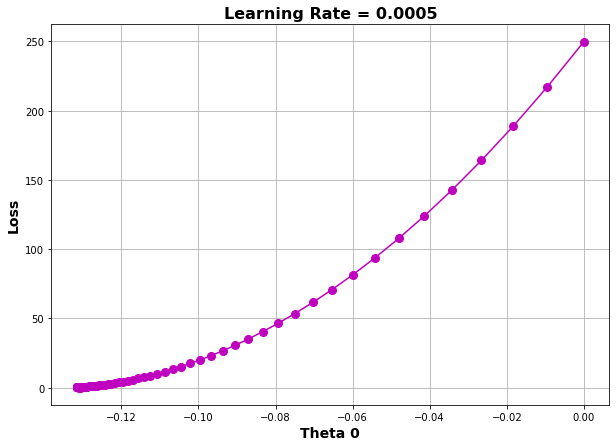

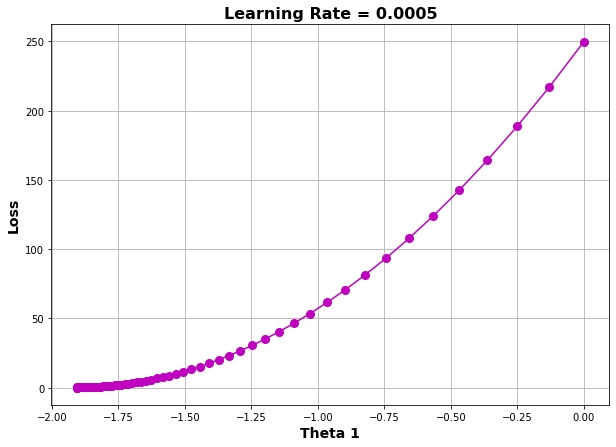

#### Plot all regression lines till converge

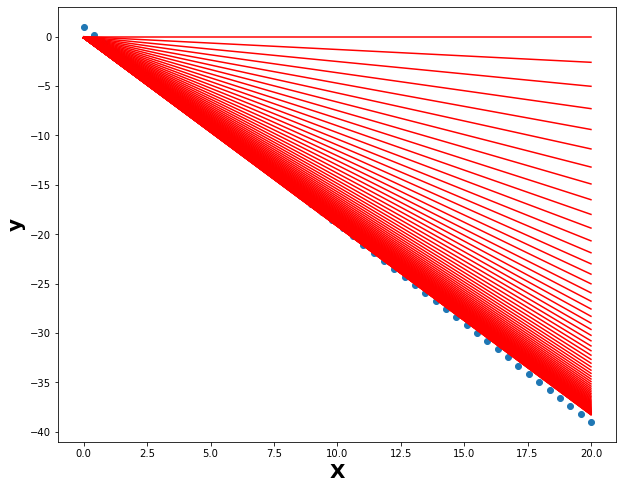

In [79]:
plt.figure(figsize=(10,8))
plt.plot(X[:,1],y,'o')
plt.xlabel("X", fontweight='bold',fontsize=20)
plt.ylabel("y", fontweight='bold',fontsize=20)
for i in range(theta.shape[1]):
    plt.plot(X[:,1],X@theta[:,i],color='red')


#### Plot the best regression line

Text(0, 0.5, 'y')

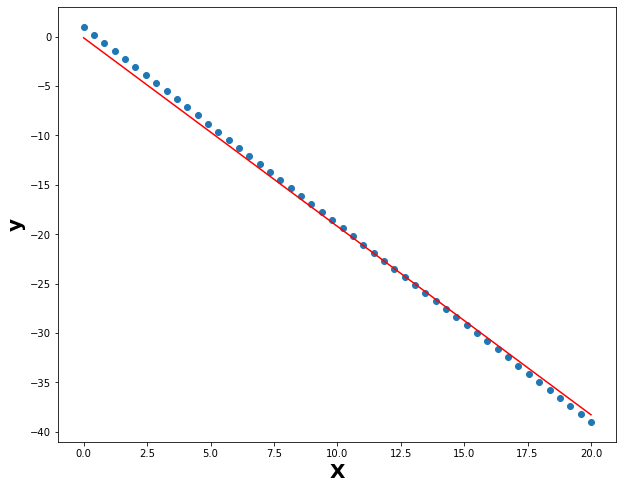

In [80]:
plt.figure(figsize=(10,8))
plt.plot(X[:,1],y,'o')
plt.plot(X[:,1],X@theta[:,-1],color='red')
plt.xlabel("X", fontweight='bold',fontsize=20)
plt.ylabel("y", fontweight='bold',fontsize=20)

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

##### The following results uses alpha = 0.00005 and max. iterations = 1000.

# Increasing the alpha will  increase the jumps in thetas and it might need more itteration to reach desired accuracy if it could. 

# decreasing the alpha can have a more accurate results but more iterations will be needed

In [81]:
theta2, loss_mat2 =GD(X,y,alpha = 0.00005,max_iter=1000,grad_norm_min=0.1)
theta2[:,-1]

****************** Iteration 0 ********************

h(x) = [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

Error Vector : [[-1.        ]
 [-0.18367347]
 [ 0.63265306]
 [ 1.44897959]
 [ 2.26530612]
 [ 3.08163265]
 [ 3.89795918]
 [ 4.71428571]
 [ 5.53061224]
 [ 6.34693878]
 [ 7.16326531]
 [ 7.97959184]
 [ 8.79591837]
 [ 9.6122449 ]
 [10.42857143]
 [11.24489796]
 [12.06122449]
 [12.87755102]
 [13.69387755]
 [14.51020408]
 [15.32653061]
 [16.14285714]
 [16.95918367]
 [17.7755102 ]
 [18.59183673]
 [19.40816327]
 [20.2244898 ]
 [21.04081633]
 [21.85714286]
 [22.67346939]
 [23.48979592]
 [24.30612245]
 [25.12244898]
 [25.93877551]
 [26.75510204]
 [27.57142857]
 [28.3877551 ]
 [29.20408163]
 [30.02040816]
 [30.83673469]
 [31.65306122]
 [32.469


j = 49.72580464149801

gradiant vector = [[  8.30235013]
 [115.56496801]]

gradiant vector norm = 115.86281046738716

theta : [[-0.07724909]
 [-1.06204008]]

****************** Iteration 120 ********************

h(x) = [[ -0.07766421]
 [ -0.51350842]
 [ -0.94935264]
 [ -1.38519685]
 [ -1.82104106]
 [ -2.25688528]
 [ -2.69272949]
 [ -3.12857371]
 [ -3.56441792]
 [ -4.00026214]
 [ -4.43610635]
 [ -4.87195057]
 [ -5.30779478]
 [ -5.743639  ]
 [ -6.17948321]
 [ -6.61532743]
 [ -7.05117164]
 [ -7.48701586]
 [ -7.92286007]
 [ -8.35870429]
 [ -8.7945485 ]
 [ -9.23039272]
 [ -9.66623693]
 [-10.10208115]
 [-10.53792536]
 [-10.97376958]
 [-11.40961379]
 [-11.84545801]
 [-12.28130222]
 [-12.71714644]
 [-13.15299065]
 [-13.58883487]
 [-14.02467908]
 [-14.46052329]
 [-14.89636751]
 [-15.33221172]
 [-15.76805594]
 [-16.20390015]
 [-16.63974437]
 [-17.07558858]
 [-17.5114328 ]
 [-17.94727701]
 [-18.38312123]
 [-18.81896544]
 [-19.25480966]
 [-19.69065387]
 [-20.12649809]
 [-20.5623423 ]
 [-20.99818


Error Vector : [[-1.11174191]
 [-0.92824071]
 [-0.7447395 ]
 [-0.5612383 ]
 [-0.37773709]
 [-0.19423589]
 [-0.01073468]
 [ 0.17276652]
 [ 0.35626773]
 [ 0.53976893]
 [ 0.72327014]
 [ 0.90677134]
 [ 1.09027255]
 [ 1.27377375]
 [ 1.45727496]
 [ 1.64077616]
 [ 1.82427737]
 [ 2.00777857]
 [ 2.19127978]
 [ 2.37478098]
 [ 2.55828219]
 [ 2.74178339]
 [ 2.9252846 ]
 [ 3.1087858 ]
 [ 3.29228701]
 [ 3.47578821]
 [ 3.65928942]
 [ 3.84279062]
 [ 4.02629183]
 [ 4.20979303]
 [ 4.39329424]
 [ 4.57679544]
 [ 4.76029665]
 [ 4.94379785]
 [ 5.12729906]
 [ 5.31080026]
 [ 5.49430147]
 [ 5.67780267]
 [ 5.86130388]
 [ 6.04480508]
 [ 6.22830629]
 [ 6.41180749]
 [ 6.5953087 ]
 [ 6.7788099 ]
 [ 6.96231111]
 [ 7.14581231]
 [ 7.32931352]
 [ 7.51281472]
 [ 7.69631593]
 [ 7.87981713]]

j = 9.232024347565748

gradiant vector = [[ 3.38403761]
 [49.43797851]]

gradiant vector norm = 49.55366212595213

theta : [[-0.11174191]
 [-1.55042205]]

****************** Iteration 245 ********************

h(x) = [[ -0.11191111]


j = 2.145102492448998

gradiant vector = [[ 1.42594613]
 [23.10819056]]

gradiant vector norm = 23.15214446700155

theta : [[-0.12456994]
 [-1.74494839]]

****************** Iteration 357 ********************

h(x) = [[ -0.12464123]
 [ -0.83733666]
 [ -1.55003209]
 [ -2.26272752]
 [ -2.97542295]
 [ -3.68811838]
 [ -4.40081381]
 [ -5.11350924]
 [ -5.82620467]
 [ -6.5389001 ]
 [ -7.25159553]
 [ -7.96429096]
 [ -8.67698639]
 [ -9.38968182]
 [-10.10237725]
 [-10.81507268]
 [-11.52776811]
 [-12.24046354]
 [-12.95315897]
 [-13.6658544 ]
 [-14.37854983]
 [-15.09124525]
 [-15.80394068]
 [-16.51663611]
 [-17.22933154]
 [-17.94202697]
 [-18.6547224 ]
 [-19.36741783]
 [-20.08011326]
 [-20.79280869]
 [-21.50550412]
 [-22.21819955]
 [-22.93089498]
 [-23.64359041]
 [-24.35628584]
 [-25.06898127]
 [-25.7816767 ]
 [-26.49437213]
 [-27.20706756]
 [-27.91976299]
 [-28.63245842]
 [-29.34515385]
 [-30.05784928]
 [-30.77054471]
 [-31.48324014]
 [-32.19593557]
 [-32.908631  ]
 [-33.62132642]
 [-34.33402185


h(x) = [[ -0.13015731]
 [ -0.88364035]
 [ -1.63712339]
 [ -2.39060644]
 [ -3.14408948]
 [ -3.89757252]
 [ -4.65105556]
 [ -5.4045386 ]
 [ -6.15802164]
 [ -6.91150468]
 [ -7.66498772]
 [ -8.41847076]
 [ -9.1719538 ]
 [ -9.92543685]
 [-10.67891989]
 [-11.43240293]
 [-12.18588597]
 [-12.93936901]
 [-13.69285205]
 [-14.44633509]
 [-15.19981813]
 [-15.95330117]
 [-16.70678422]
 [-17.46026726]
 [-18.2137503 ]
 [-18.96723334]
 [-19.72071638]
 [-20.47419942]
 [-21.22768246]
 [-21.9811655 ]
 [-22.73464854]
 [-23.48813158]
 [-24.24161463]
 [-24.99509767]
 [-25.74858071]
 [-26.50206375]
 [-27.25554679]
 [-28.00902983]
 [-28.76251287]
 [-29.51599591]
 [-30.26947895]
 [-31.02296199]
 [-31.77644504]
 [-32.52992808]
 [-33.28341112]
 [-34.03689416]
 [-34.7903772 ]
 [-35.54386024]
 [-36.29734328]
 [-37.05082632]]

Error Vector : [[-1.13015731e+00]
 [-1.06731382e+00]
 [-1.00447033e+00]
 [-9.41626844e-01]
 [-8.78783354e-01]
 [-8.15939865e-01]
 [-7.53096375e-01]
 [-6.90252885e-01]
 [-6.27409396e-01]
 [-5


****************** Iteration 590 ********************

h(x) = [[ -0.13126034]
 [ -0.89897448]
 [ -1.66668862]
 [ -2.43440276]
 [ -3.2021169 ]
 [ -3.96983104]
 [ -4.73754518]
 [ -5.50525932]
 [ -6.27297346]
 [ -7.0406876 ]
 [ -7.80840174]
 [ -8.57611588]
 [ -9.34383002]
 [-10.11154416]
 [-10.8792583 ]
 [-11.64697244]
 [-12.41468658]
 [-13.18240072]
 [-13.95011486]
 [-14.717829  ]
 [-15.48554314]
 [-16.25325728]
 [-17.02097142]
 [-17.78868556]
 [-18.5563997 ]
 [-19.32411384]
 [-20.09182798]
 [-20.85954212]
 [-21.62725626]
 [-22.3949704 ]
 [-23.16268455]
 [-23.93039869]
 [-24.69811283]
 [-25.46582697]
 [-26.23354111]
 [-27.00125525]
 [-27.76896939]
 [-28.53668353]
 [-29.30439767]
 [-30.07211181]
 [-30.83982595]
 [-31.60754009]
 [-32.37525423]
 [-33.14296837]
 [-33.91068251]
 [-34.67839665]
 [-35.44611079]
 [-36.21382493]
 [-36.98153907]
 [-37.74925321]]

Error Vector : [[-1.13126034]
 [-1.08264795]
 [-1.03403556]
 [-0.98542316]
 [-0.93681077]
 [-0.88819838]
 [-0.83958599]
 [-0.7909736 ]


array([-0.13128498, -1.88319393])

In [82]:
r2_score(y,X@theta2[:,-1])

0.9965793400861428

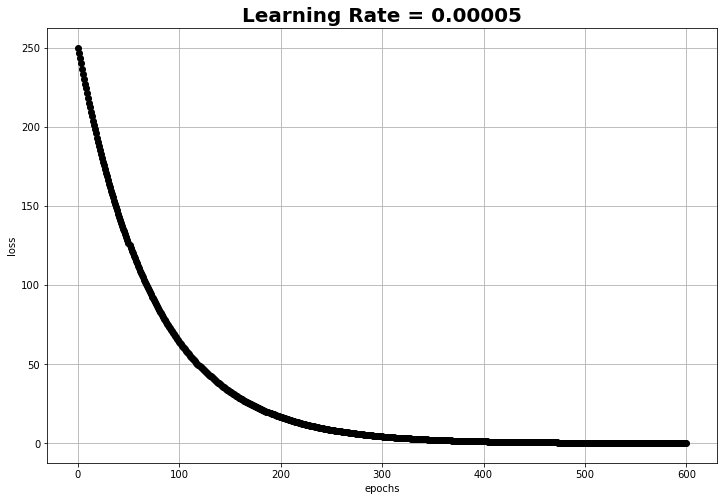

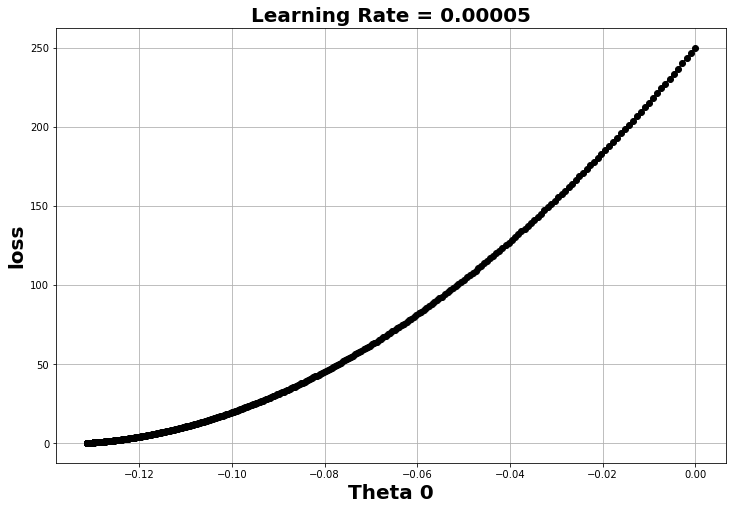

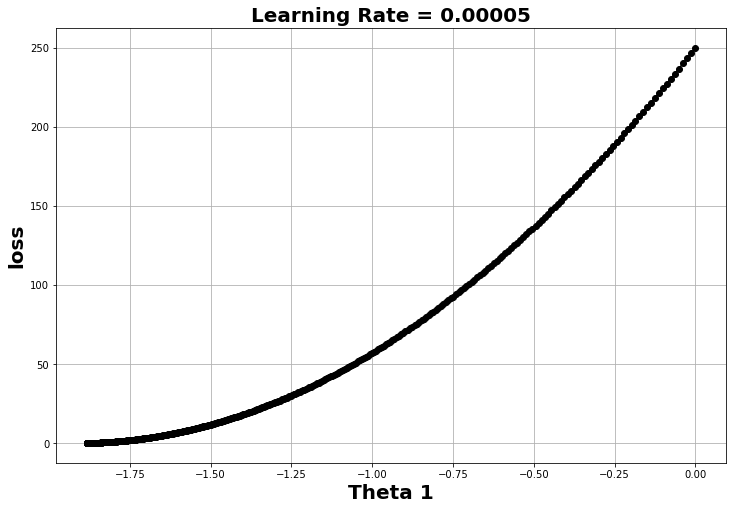

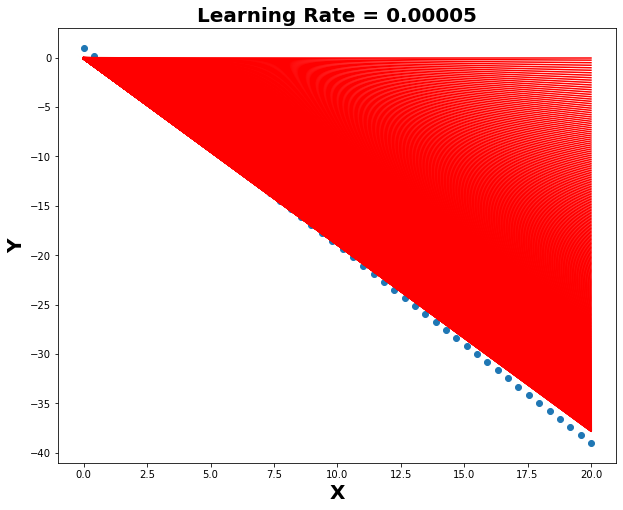

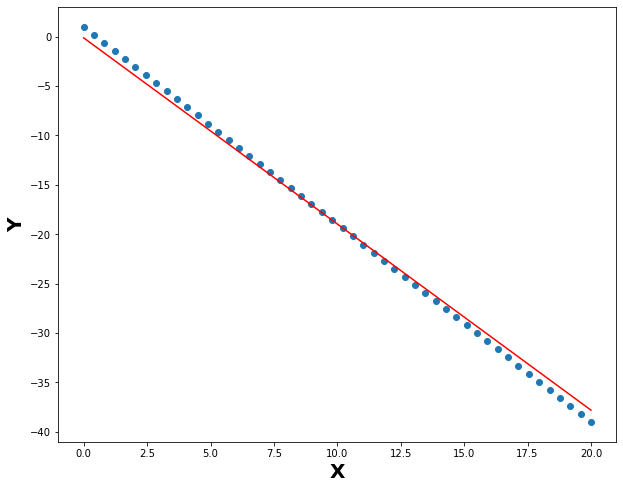

In [83]:

plt.figure(figsize=(12,8))
plt.title('Learning Rate = 0.00005', fontweight='bold',fontsize=20)
plt.grid()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(loss_mat2,'o-',color="black")

plt.figure(figsize=(12,8))
plt.title('Learning Rate = 0.00005', fontweight='bold',fontsize=20)
plt.grid()
plt.xlabel("Theta 0", fontweight='bold',fontsize=20)
plt.ylabel("loss", fontweight='bold',fontsize=20)
plt.plot(theta2[0,:],loss_mat2,'o-',color="black")

plt.figure(figsize=(12,8))
plt.title('Learning Rate = 0.00005', fontweight='bold',fontsize=20)
plt.grid()
plt.xlabel("Theta 1", fontweight='bold',fontsize=20)
plt.ylabel("loss", fontweight='bold',fontsize=20)
plt.plot(theta2[1,:],loss_mat2,'o-',color="black")

plt.figure(figsize=(10,8))
plt.plot(X[:,1],y,'o')
plt.xlabel("X", fontweight='bold',fontsize=20)
plt.ylabel("Y", fontweight='bold',fontsize=20)
for i in range(theta2.shape[1]):
    plt.plot(X[:,1],X@theta2[:,i],color='red')
    
plt.title('Learning Rate = 0.00005', fontweight='bold',fontsize=20)    
plt.figure(figsize=(10,8))
plt.xlabel("X", fontweight='bold',fontsize=20)
plt.ylabel("Y", fontweight='bold',fontsize=20)
plt.plot(X[:,1],y,'o')
plt.plot(X[:,1],X@theta2[:,-1],color='red')


##### The following results uses alpha = 0.005 and max. iterations = 300.

In [84]:
theta3, loss_mat3 =GD(X,y,alpha = 0.005,max_iter=300,grad_norm_min=0.1)
theta3[:,-1]

****************** Iteration 0 ********************

h(x) = [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

Error Vector : [[-1.        ]
 [-0.18367347]
 [ 0.63265306]
 [ 1.44897959]
 [ 2.26530612]
 [ 3.08163265]
 [ 3.89795918]
 [ 4.71428571]
 [ 5.53061224]
 [ 6.34693878]
 [ 7.16326531]
 [ 7.97959184]
 [ 8.79591837]
 [ 9.6122449 ]
 [10.42857143]
 [11.24489796]
 [12.06122449]
 [12.87755102]
 [13.69387755]
 [14.51020408]
 [15.32653061]
 [16.14285714]
 [16.95918367]
 [17.7755102 ]
 [18.59183673]
 [19.40816327]
 [20.2244898 ]
 [21.04081633]
 [21.85714286]
 [22.67346939]
 [23.48979592]
 [24.30612245]
 [25.12244898]
 [25.93877551]
 [26.75510204]
 [27.57142857]
 [28.3877551 ]
 [29.20408163]
 [30.02040816]
 [30.83673469]
 [31.65306122]
 [32.469

array([-0.13219113, -1.91507981])

In [85]:
r2_score(y,X@theta3[:,-1])

0.9976200723230484

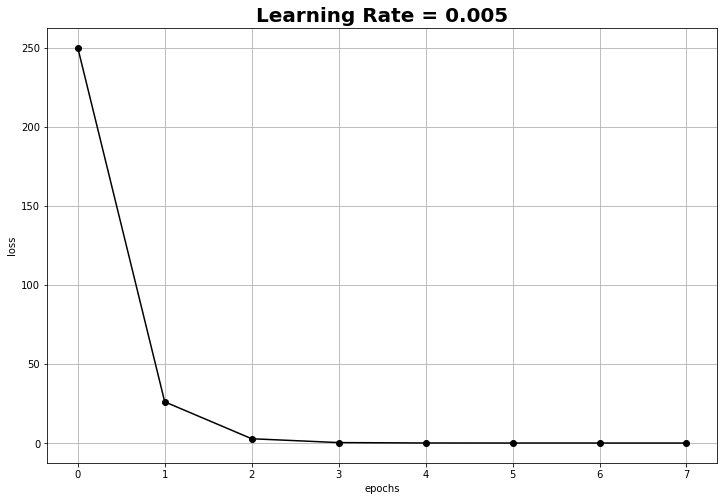

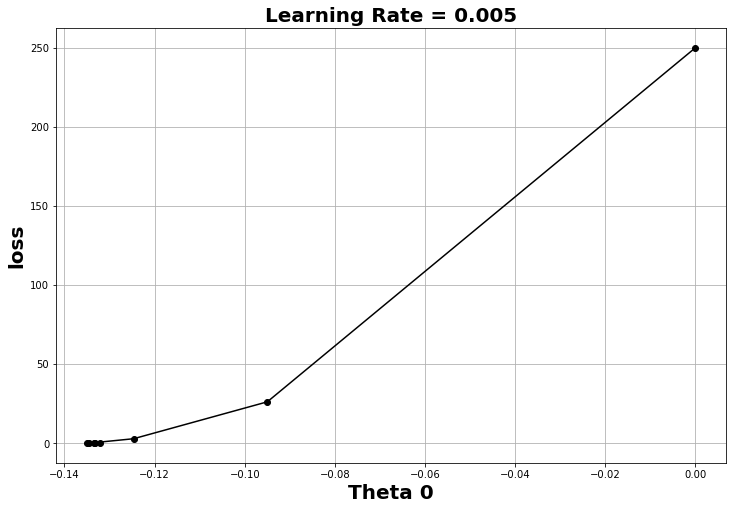

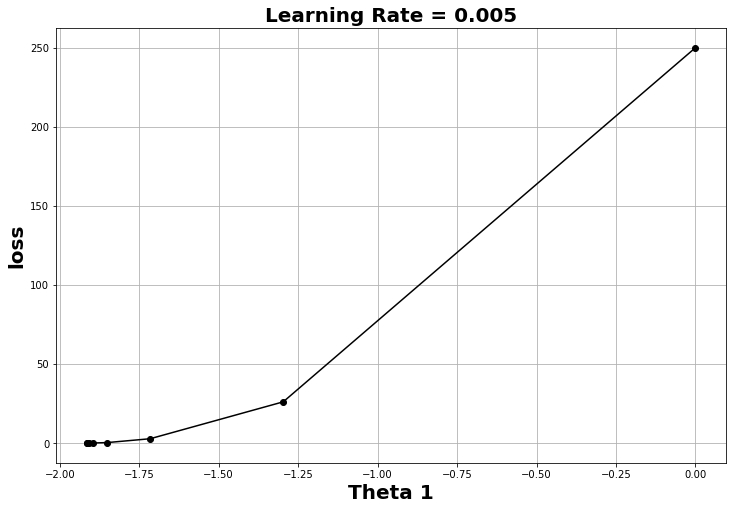

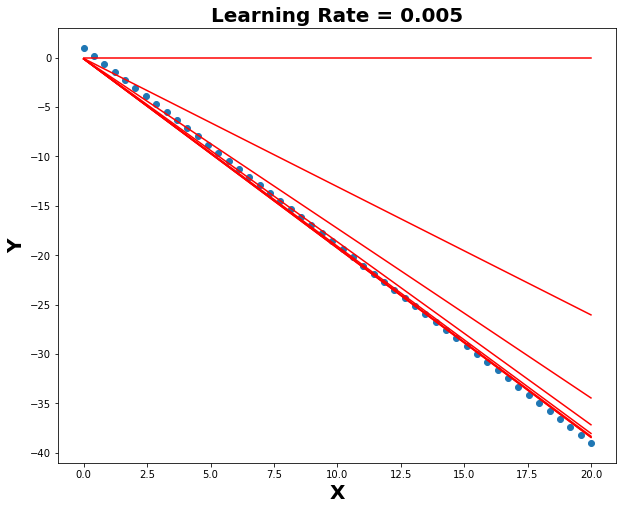

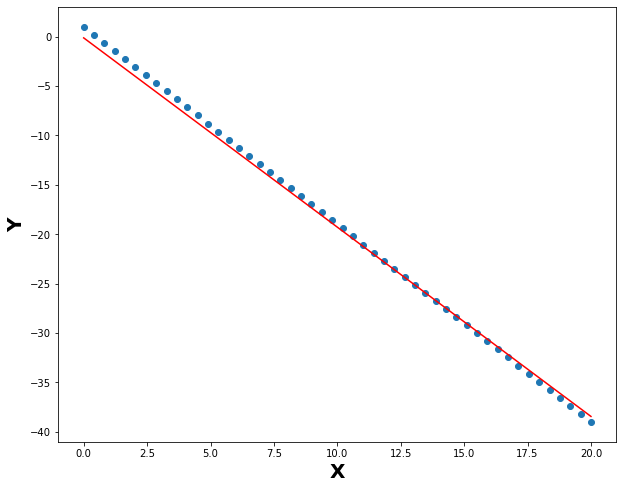

In [87]:

plt.figure(figsize=(12,8))
plt.title('Learning Rate = 0.005', fontweight='bold',fontsize=20)
plt.grid()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(loss_mat3,'o-',color="black")

plt.figure(figsize=(12,8))
plt.title('Learning Rate = 0.005', fontweight='bold',fontsize=20)
plt.grid()
plt.xlabel("Theta 0", fontweight='bold',fontsize=20)
plt.ylabel("loss", fontweight='bold',fontsize=20)
plt.plot(theta3[0,:],loss_mat3,'o-',color="black")

plt.figure(figsize=(12,8))
plt.title('Learning Rate = 0.005', fontweight='bold',fontsize=20)
plt.grid()
plt.xlabel("Theta 1", fontweight='bold',fontsize=20)
plt.ylabel("loss", fontweight='bold',fontsize=20)
plt.plot(theta3[1,:],loss_mat3,'o-',color="black")

plt.figure(figsize=(10,8))
plt.plot(X[:,1],y,'o')
plt.xlabel("X", fontweight='bold',fontsize=20)
plt.ylabel("Y", fontweight='bold',fontsize=20)
for i in range(theta3.shape[1]):
    plt.plot(X[:,1],X@theta3[:,i],color='red')
    
plt.title('Learning Rate = 0.005', fontweight='bold',fontsize=20)    
plt.figure(figsize=(10,8))
plt.xlabel("X", fontweight='bold',fontsize=20)
plt.ylabel("Y", fontweight='bold',fontsize=20)
plt.plot(X[:,1],y,'o')
plt.plot(X[:,1],X@theta3[:,-1],color='red')


## Stochastic GD

#### Update the implementation of the Batch GD to be Stochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to the Batch GD.
#### Do not forget to shuffle the data.

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
- <font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>


#  Stocastic GD is faster computationaly as we do not need to perform matrix multiplication and inverse but it is much noiser than vanilla gradient desent as we update the model parameters after processing each single element

In [103]:
def SGD(X,y,alpha = 0.001,max_iter=1000,grad_norm_min=0.001):
    #X =np.c_[np.ones((X.shape[0],1)),X] 
    theta_n = np.zeros((X.shape[1],1))
    theta = []
    #print("thta",theta.shape)
    curr_iter=0
    epoch =0
    norm_gradiant_vector= 10000000
    j_mat=[]
    loss_sum_epoch =[]
    # shuffling x,y
    X, y = shuffle(X, y)
#     print("X",X.shape)
#     print("y",y.shape)
    stop = False
    while(epoch <= max_iter and not stop):
        #epoch test 
        curr_theta_epoch = theta_n
        h_x_epoch = np.dot(X,curr_theta_epoch)
        Error_Vector_epoch =h_x_epoch - y    
        loss_sum_epoch.append((np.linalg.norm(Error_Vector_epoch)**2)/(2*X.shape[0])) 
        d_theta_epoch = np.dot(X.transpose(),Error_Vector_epoch)/(Error_Vector_epoch.shape[0])
        norm_gradiant_vector_epoch=np.linalg.norm(d_theta_epoch)
        
        print("****************** epoch " +str(epoch) + " ********************"+"\n")
        #print("h(x) = " + str(h_x_epoch)+"\n")
        #print("Error Vector : "+ str(Error_Vector_epoch)+"\n")
        print("loss = "+str(loss_sum_epoch[-1])+"\n")
        print("gradiant vector = " + str(d_theta_epoch)+"\n")
        print("gradiant vector norm = " + str(norm_gradiant_vector_epoch)+"\n")
        print("theta : "+str(theta_n)+"\n")
        if  (norm_gradiant_vector_epoch < grad_norm_min) or ((len(loss_sum_epoch)>1) and (abs(loss_sum_epoch[-2]-loss_sum_epoch[-1]) <= 0.001)):
            break
            
        #iteration    
        for i in range(X.shape[0]):
            theta.append(theta_n)
            x_curr =X[i,:].reshape(1,-1)
            y_curr = y[i,:].reshape(-1,1)
            #print("x_curr",x_curr.shape)
            #print("y_curr",y_curr.shape)
            h_x = np.dot(x_curr,theta_n)
            #print("h_x",h_x.shape)
            Error_Vector =h_x - y_curr
            #print("E",Error_Vector.shape)
            j = (np.linalg.norm(Error_Vector)**2)/(2)
            j_mat.append(j)

#             if (len(j_mat)>1) and (abs(j_mat[-2]-j_mat[-1]) <= 0.001):
#                 break


            d_theta = np.dot(x_curr.transpose(),Error_Vector)
            #print("d_t",d_theta.shape)
            norm_gradiant_vector=np.linalg.norm(d_theta)   
#             if  norm_gradiant_vector < grad_norm_min :

#                 break
            theta_n=theta_n - alpha*d_theta

            #print(theta_n.shape)
            #theta =  np.c_[ theta, theta_n ] # start of it
     
        
        epoch+=1
    print("****************** Training Report ********************")
    print("Gradient Descent converged after ", epoch-1," epochs")
    print("theta_0_Opt : ",theta[-1][0],"")
    print("theta_0_Opt : ",theta[-1][1],"")
    print("Error Vector : "+ str(np.dot(x_curr,theta_n)-y)+"\n")
    print("h(x): y predict = " + str(np.dot(X,theta[-1]))+"\n")
    print("y actual: ", str(y))    
        
    return np.array(theta).reshape((len(theta),len(theta[0]))).transpose(),j_mat 

##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [104]:
thetaSGD,loss_matSGD = SGD(X,y,alpha = 0.0005,max_iter=300,grad_norm_min=0.001)
print(thetaSGD[:,-1])

****************** epoch 0 ********************

loss = 249.88775510204087

gradiant vector = [[ 19.       ]
 [259.3877551]]

gradiant vector norm = 260.08269357432505

theta : [[0.]
 [0.]]

****************** epoch 1 ********************

loss = 0.32909026388621826

gradiant vector = [[0.20031658]
 [6.63379022]]

gradiant vector norm = 6.636813950017966

theta : [[-0.13439282]
 [-1.86652906]]

****************** epoch 2 ********************

loss = 0.1647892025131591

gradiant vector = [[-0.30283905]
 [-0.15566961]]

gradiant vector norm = 0.34050627064211125

theta : [[-0.13085862]
 [-1.91719804]]

****************** epoch 3 ********************

loss = 0.16302931394654296

gradiant vector = [[-0.31437055]
 [-0.33595149]]

gradiant vector norm = 0.4601002571681339

theta : [[-0.12366434]
 [-1.91907062]]

****************** epoch 4 ********************

loss = 0.1609454106846541

gradiant vector = [[-0.31270468]
 [-0.33865529]]

gradiant vector norm = 0.46094643773133476

theta : [[-0

In [105]:
r2_score(y,X@thetaSGD[:,-1])

0.9989001527027972

# it is Clear from the plots  stochastic GD is much more noiser than vanilla GD

#  If the learning rate is too small, the algorithm may take a long time to converge to the optimal solution, or it may get stuck in a local minimum while having a too high learing rate may lead to divergance and less acurate results 

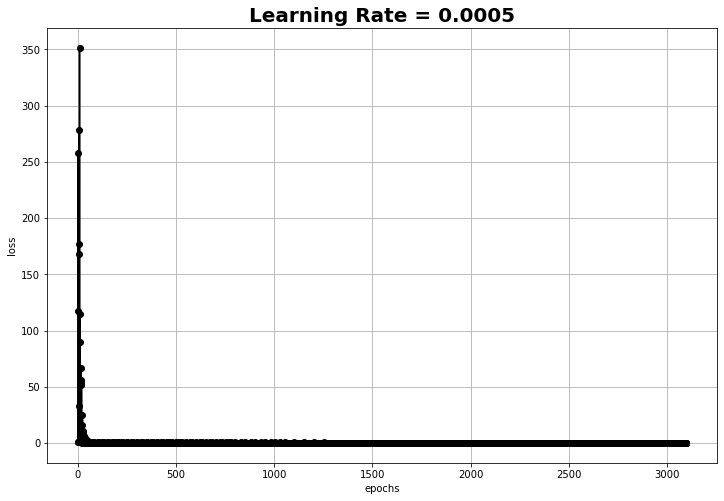

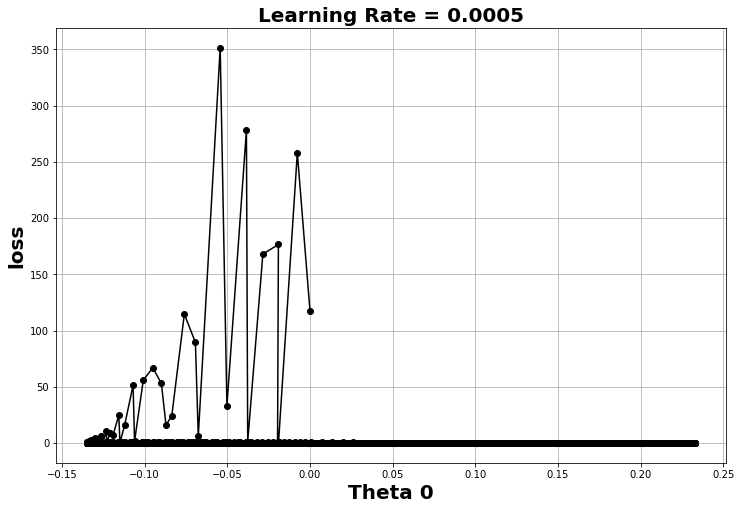

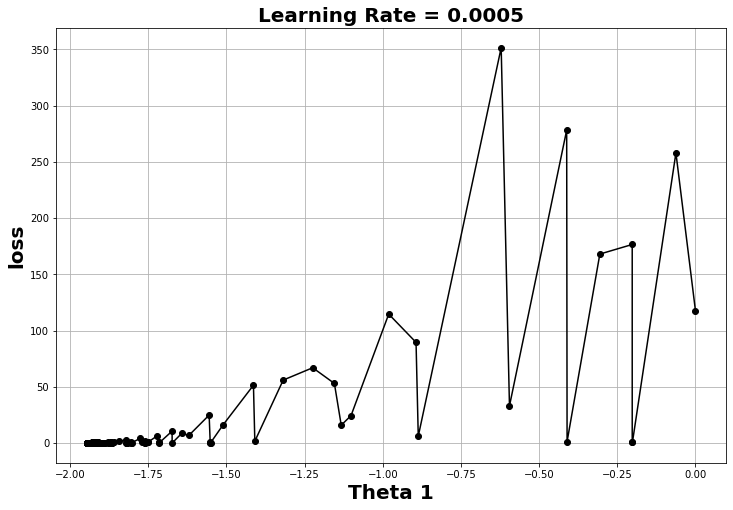

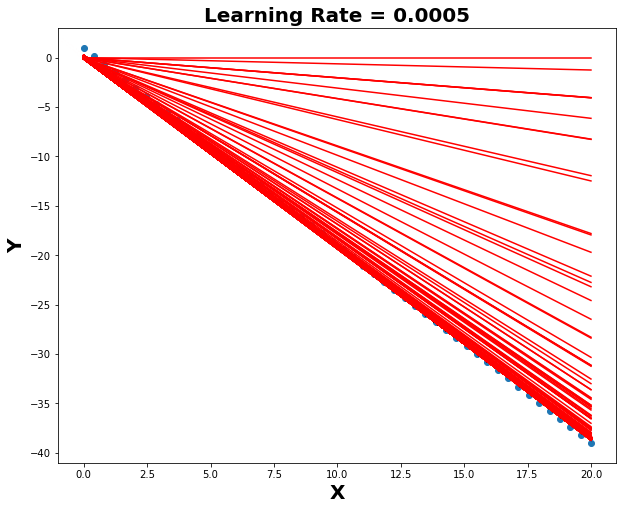

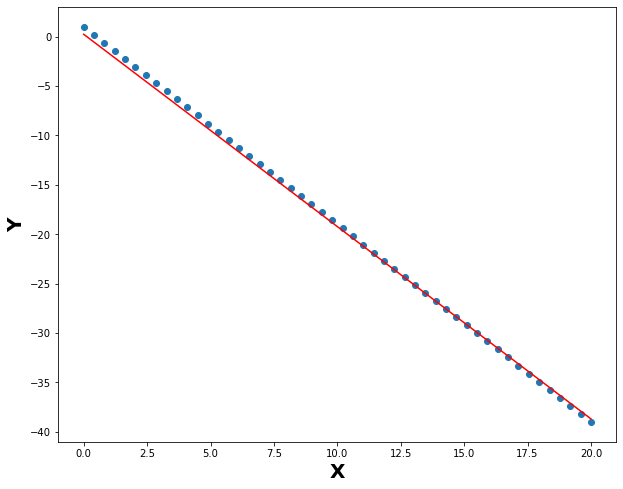

In [107]:
plt.figure(figsize=(12,8))
plt.title('Learning Rate = 0.0005', fontweight='bold',fontsize=20)
plt.grid()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(loss_matSGD,'o-',color="black")

plt.figure(figsize=(12,8))
plt.title('Learning Rate = 0.0005', fontweight='bold',fontsize=20)
plt.grid()
plt.xlabel("Theta 0", fontweight='bold',fontsize=20)
plt.ylabel("loss", fontweight='bold',fontsize=20)
plt.plot(thetaSGD[0,:],loss_matSGD,'o-',color="black")

plt.figure(figsize=(12,8))
plt.title('Learning Rate = 0.0005', fontweight='bold',fontsize=20)
plt.grid()
plt.xlabel("Theta 1", fontweight='bold',fontsize=20)
plt.ylabel("loss", fontweight='bold',fontsize=20)
plt.plot(thetaSGD[1,:],loss_matSGD,'o-',color="black")

plt.figure(figsize=(10,8))
plt.plot(X[:,1],y,'o')
plt.xlabel("X", fontweight='bold',fontsize=20)
plt.ylabel("Y", fontweight='bold',fontsize=20)
for i in range(thetaSGD.shape[1]):
    plt.plot(X[:,1],X@thetaSGD[:,i],color='red')
    
plt.title('Learning Rate = 0.0005', fontweight='bold',fontsize=20)    
plt.figure(figsize=(10,8))
plt.xlabel("X", fontweight='bold',fontsize=20)
plt.ylabel("Y", fontweight='bold',fontsize=20)
plt.plot(X[:,1],y,'o')
plt.plot(X[:,1],X@thetaSGD[:,-1],color='red')


##### The following results uses alpha = 0.0001 and max. iterations = 300.

In [108]:
thetaSGD,loss_matSGD = SGD(X,y,alpha = 0.0001,max_iter=300,grad_norm_min=0.001)

****************** epoch 0 ********************

loss = 249.88775510204087

gradiant vector = [[ 19.       ]
 [259.3877551]]

gradiant vector norm = 260.08269357432505

theta : [[0.]
 [0.]]

****************** epoch 1 ********************

loss = 63.53588166635616

gradiant vector = [[  9.4263838 ]
 [130.67576362]]

gradiant vector norm = 131.0153117320348

theta : [[-0.0688183 ]
 [-0.95047979]]

****************** epoch 2 ********************

loss = 16.24654345671278

gradiant vector = [[ 4.6038082 ]
 [65.83638271]]

gradiant vector norm = 65.99715401954788

theta : [[-0.10276083]
 [-1.4293431 ]]

****************** epoch 3 ********************

loss = 4.246342475372419

gradiant vector = [[ 2.1745951 ]
 [33.17317937]]

gradiant vector norm = 33.244378374108145

theta : [[-0.11913544]
 [-1.67062695]]

****************** epoch 4 ********************

loss = 1.2010971827296648

gradiant vector = [[ 0.95105123]
 [16.71890179]]

gradiant vector norm = 16.745930116675122

theta : [[-0.126

In [109]:
r2_score(y,X@thetaSGD[:,-1])

0.9976474458255847

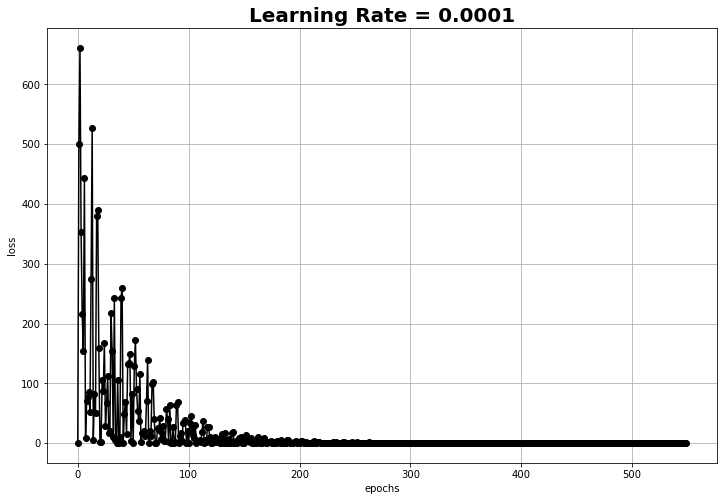

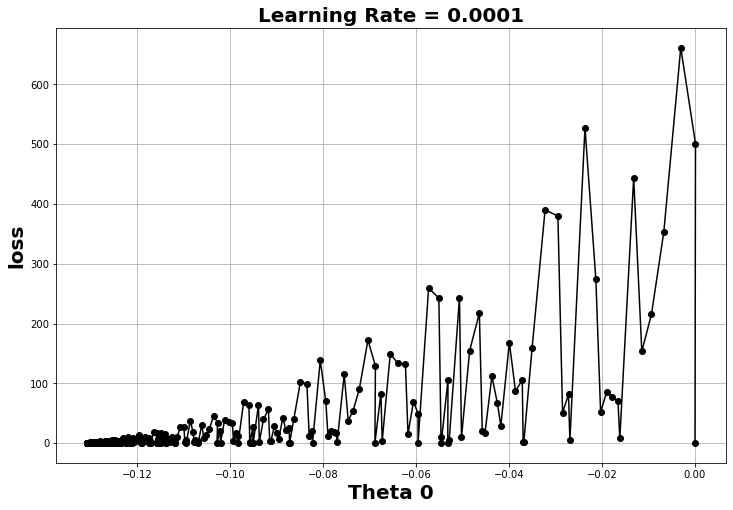

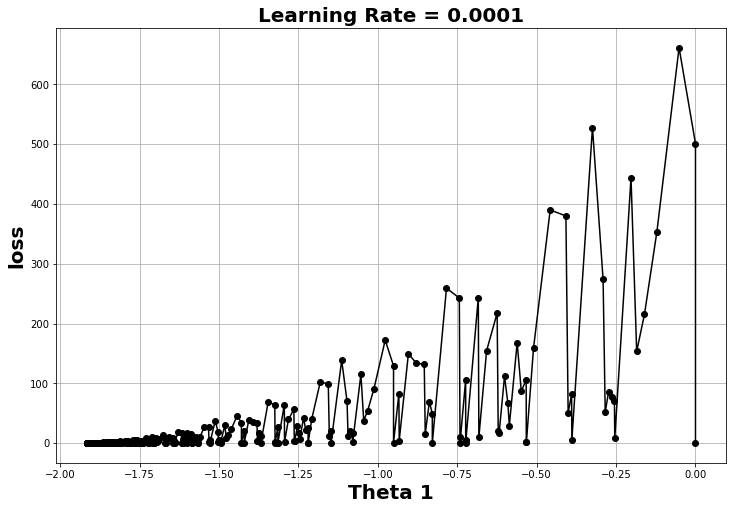

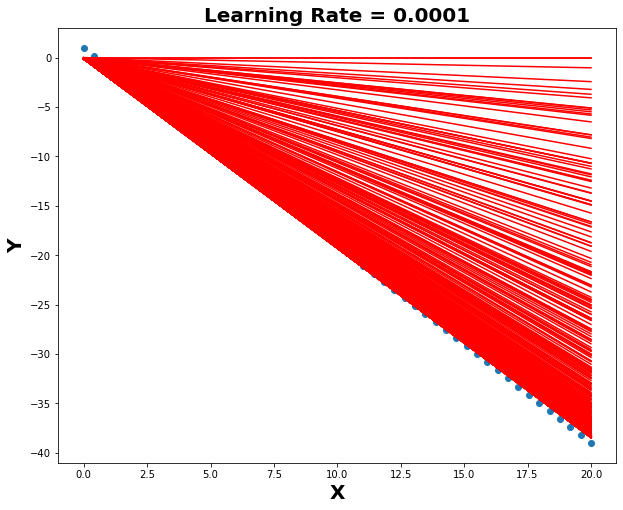

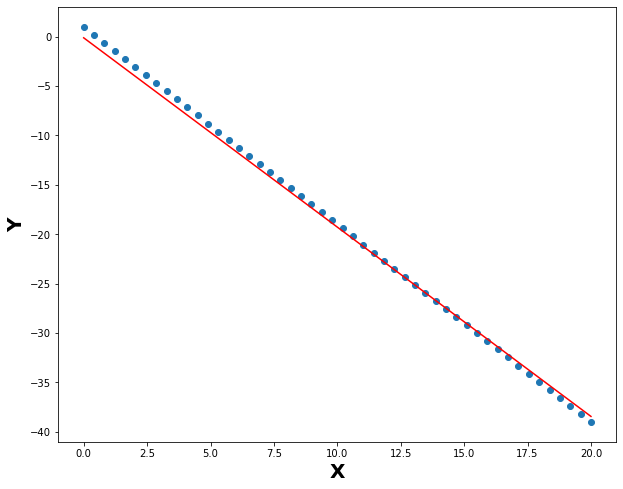

In [111]:
plt.figure(figsize=(12,8))
plt.title('Learning Rate = 0.0001', fontweight='bold',fontsize=20)
plt.grid()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(loss_matSGD,'o-',color="black")

plt.figure(figsize=(12,8))
plt.title('Learning Rate = 0.0001', fontweight='bold',fontsize=20)
plt.grid()
plt.xlabel("Theta 0", fontweight='bold',fontsize=20)
plt.ylabel("loss", fontweight='bold',fontsize=20)
plt.plot(thetaSGD[0,:],loss_matSGD,'o-',color="black")

plt.figure(figsize=(12,8))
plt.title('Learning Rate = 0.0001', fontweight='bold',fontsize=20)
plt.grid()
plt.xlabel("Theta 1", fontweight='bold',fontsize=20)
plt.ylabel("loss", fontweight='bold',fontsize=20)
plt.plot(thetaSGD[1,:],loss_matSGD,'o-',color="black")

plt.figure(figsize=(10,8))
plt.plot(X[:,1],y,'o')
plt.xlabel("X", fontweight='bold',fontsize=20)
plt.ylabel("Y", fontweight='bold',fontsize=20)
for i in range(thetaSGD.shape[1]):
    plt.plot(X[:,1],X@thetaSGD[:,i],color='red')
    
plt.title('Learning Rate = 0.0001', fontweight='bold',fontsize=20)    
plt.figure(figsize=(10,8))
plt.xlabel("X", fontweight='bold',fontsize=20)
plt.ylabel("Y", fontweight='bold',fontsize=20)
plt.plot(X[:,1],y,'o')
plt.plot(X[:,1],X@thetaSGD[:,-1],color='red')


##### The following results uses alpha = 0.00007 and max. iterations = 300.

In [112]:
thetaSGD,loss_matSGD = SGD(X,y,alpha = 0.00007,max_iter=300,grad_norm_min=0.001)

****************** epoch 0 ********************

loss = 249.88775510204087

gradiant vector = [[ 19.       ]
 [259.3877551]]

gradiant vector norm = 260.08269357432505

theta : [[0.]
 [0.]]

****************** epoch 1 ********************

loss = 96.09850987955124

gradiant vector = [[ 11.66516261]
 [160.77707384]]

gradiant vector norm = 161.1997006521758

theta : [[-0.0533488 ]
 [-0.72814886]]

****************** epoch 2 ********************

loss = 37.01081793988127

gradiant vector = [[ 7.11823096]
 [99.6460784 ]]

gradiant vector norm = 99.90000076810999

theta : [[-0.08603181]
 [-1.17957372]]

****************** epoch 3 ********************

loss = 14.311876188068872

gradiant vector = [[ 4.29958575]
 [61.7495973 ]]

gradiant vector norm = 61.89910503461664

theta : [[-0.10590398]
 [-1.45945103]]

****************** epoch 4 ********************

loss = 5.593902146206043

gradiant vector = [[ 2.55234472]
 [38.25672294]]

gradiant vector norm = 38.34176982765296

theta : [[-0.11783

In [113]:
r2_score(y,X@thetaSGD[:,-1])

0.9976292083031089

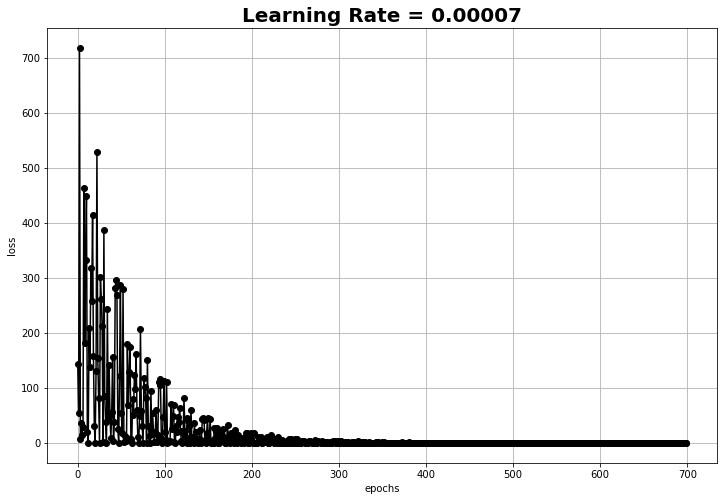

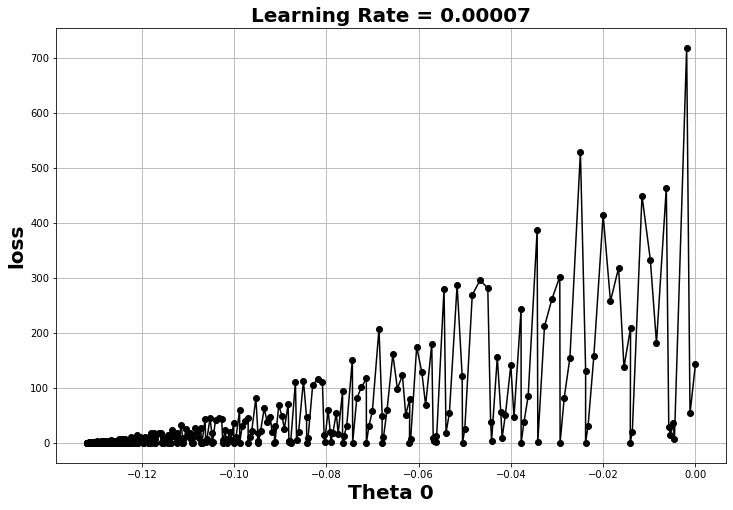

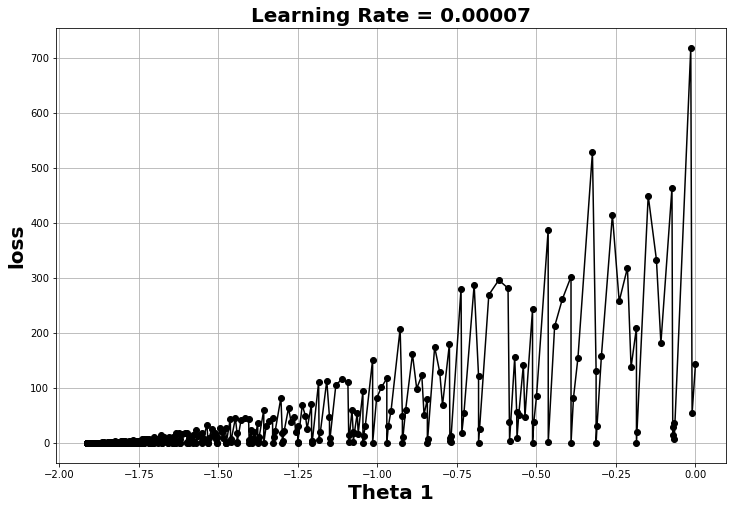

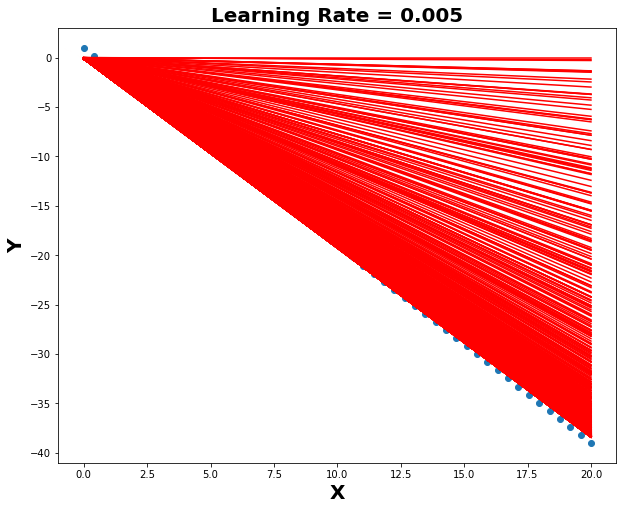

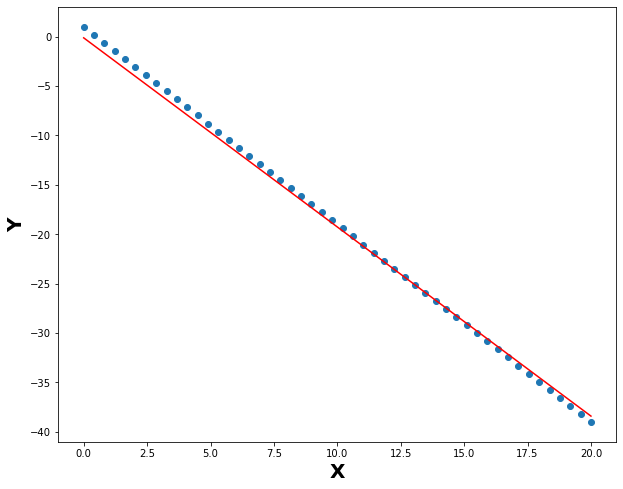

In [114]:
plt.figure(figsize=(12,8))
plt.title('Learning Rate = 0.00007', fontweight='bold',fontsize=20)
plt.grid()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(loss_matSGD,'o-',color="black")

plt.figure(figsize=(12,8))
plt.title('Learning Rate = 0.00007', fontweight='bold',fontsize=20)
plt.grid()
plt.xlabel("Theta 0", fontweight='bold',fontsize=20)
plt.ylabel("loss", fontweight='bold',fontsize=20)
plt.plot(thetaSGD[0,:],loss_matSGD,'o-',color="black")

plt.figure(figsize=(12,8))
plt.title('Learning Rate = 0.00007', fontweight='bold',fontsize=20)
plt.grid()
plt.xlabel("Theta 1", fontweight='bold',fontsize=20)
plt.ylabel("loss", fontweight='bold',fontsize=20)
plt.plot(thetaSGD[1,:],loss_matSGD,'o-',color="black")

plt.figure(figsize=(10,8))
plt.plot(X[:,1],y,'o')
plt.xlabel("X", fontweight='bold',fontsize=20)
plt.ylabel("Y", fontweight='bold',fontsize=20)
for i in range(thetaSGD.shape[1]):
    plt.plot(X[:,1],X@thetaSGD[:,i],color='red')
    
plt.title('Learning Rate = 0.005', fontweight='bold',fontsize=20)    
plt.figure(figsize=(10,8))
plt.xlabel("X", fontweight='bold',fontsize=20)
plt.ylabel("Y", fontweight='bold',fontsize=20)
plt.plot(X[:,1],y,'o')
plt.plot(X[:,1],X@thetaSGD[:,-1],color='red')


## Mini-Batch GD

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
#### Do not forget to shuffle the data

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
-<font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>

# Mini-Batch algorith is a compromise between batch GD and Stocastic as it is computational headach is less than Vanilla GD and smother (less noisy) than Stocastic GD but it is slower than Stocastic GD 

In [145]:
def miniGD(X,y, batch_size,alpha = 0.001,max_iter=1000,grad_norm_min=0.001):
    #X =np.c_[np.ones((X.shape[0],1)),X] 
    theta_n = np.zeros((X.shape[1],1))
    theta = []
    #print("thta",theta.shape)
    curr_iter=0
    epoch =0
    norm_gradiant_vector= 10000000
    j_mat=[]
    loss_sum_epoch =[]
    # shuffling x,y
    X, y = shuffle(X, y)
#     print("X",X.shape)
#     print("y",y.shape)
    stop = False
    while(epoch <= max_iter and not stop):
        curr_theta_epoch = theta_n
        h_x_epoch = np.dot(X,curr_theta_epoch)
        Error_Vector_epoch =h_x_epoch - y    
        loss_sum_epoch.append((np.linalg.norm(Error_Vector_epoch)**2)/(2*X.shape[0])) 
        d_theta_epoch = np.dot(X.transpose(),Error_Vector_epoch)/(Error_Vector_epoch.shape[0])
        norm_gradiant_vector_epoch=np.linalg.norm(d_theta_epoch)
        print("****************** epoch " +str(epoch) + " ********************"+"\n")
        #print("h(x) = " + str(h_x_epoch)+"\n")
        #print("Error Vector : "+ str(Error_Vector_epoch)+"\n")
        print("loss = "+str(loss_sum_epoch[-1])+"\n")
        print("gradiant vector = " + str(d_theta_epoch)+"\n")
        print("gradiant vector norm = " + str(norm_gradiant_vector_epoch)+"\n")
        print("theta : "+str(curr_theta_epoch)+"\n")
        
        if  (norm_gradiant_vector_epoch < grad_norm_min) or ((len(loss_sum_epoch)>1) and (abs(loss_sum_epoch[-2]-loss_sum_epoch[-1]) <= 0.001)):
            break
            
        for i in range(math.ceil(X.shape[0]/batch_size)):
            #print(X.shape[0]//batch_size)
            theta.append(theta_n)
            if((i+batch_size) > X.shape[0]):
                x_curr =X[i:X.shape[0],:]
                y_curr =y[i:X.shape[0],:]
            else:
                x_curr =X[i:i+batch_size,:]
                y_curr =y[i:i+batch_size,:]
                
                
                
            
#             print("x_curr",x_curr.shape)
#             print("y_curr",y_curr.shape)
            h_x = np.dot(x_curr,theta_n)
            #print("h_x",h_x.shape)
            Error_Vector =h_x - y_curr
            #print("E",Error_Vector.shape)
            j = (np.linalg.norm(Error_Vector)**2)/(2*len(Error_Vector))
            j_mat.append(j)

#             if (len(j_mat)>1) and (abs(j_mat[-2]-j_mat[-1]) <= 0.001):
#                 break


            d_theta = np.dot(x_curr.transpose(),Error_Vector)/batch_size
            #print("d_t",d_theta.shape)
            norm_gradiant_vector=np.linalg.norm(d_theta)   
#             if  norm_gradiant_vector < grad_norm_min :

#                 break
            theta_n=theta_n - alpha*d_theta

            #print(theta_n.shape)
            #theta =  np.c_[ theta, theta_n ]
     
        
        epoch+=1
    print("****************** Training Report ********************")
    print("Gradient Descent converged after ", epoch-1," epochs")
    print("theta_0_Opt : ",theta[-1][0],"")
    print("theta_0_Opt : ",theta[-1][1],"")
    print("Error Vector : "+ str(np.dot(X,theta_n)-y)+"\n")
    print("h(x): y predict = " + str(np.dot(X,theta[-1]))+"\n")
    print("y actual: ", str(y))     
        
    return np.array(theta).reshape((len(theta),len(theta[0]))).transpose(),j_mat  

##### The following results uses batch size=5, alpha = 0.0005 and max. iterations = 300.

In [165]:

thetaMini,loss_matMini = miniGD(X,y.reshape(-1,1),5,alpha = 0.0005,max_iter=300,grad_norm_min=0.001)

****************** epoch 0 ********************

loss = 249.88775510204087

gradiant vector = [[ 19.       ]
 [259.3877551]]

gradiant vector norm = 260.08269357432505

theta : [[0.]
 [0.]]

****************** epoch 1 ********************

loss = 55.8868854682919

gradiant vector = [[  8.82300647]
 [122.53903217]]

gradiant vector norm = 122.85625685892322

theta : [[-0.06604886]
 [-1.01109447]]

****************** epoch 2 ********************

loss = 12.475129655176959

gradiant vector = [[ 3.99473519]
 [57.61029312]]

gradiant vector norm = 57.748625806936246

theta : [[-0.09634786]
 [-1.4908917 ]]

****************** epoch 3 ********************

loss = 2.825765315612293

gradiant vector = [[ 1.70423474]
 [26.80493194]]

gradiant vector norm = 26.859054192247378

theta : [[-0.10968669]
 [-1.71860786]]

****************** epoch 4 ********************

loss = 0.7117001274562124

gradiant vector = [[ 0.61781234]
 [12.18985324]]

gradiant vector norm = 12.205499340131144

theta : [[-0.1

In [166]:
r2_score(y,X@thetaMini[:,-1])

0.9976958634715047

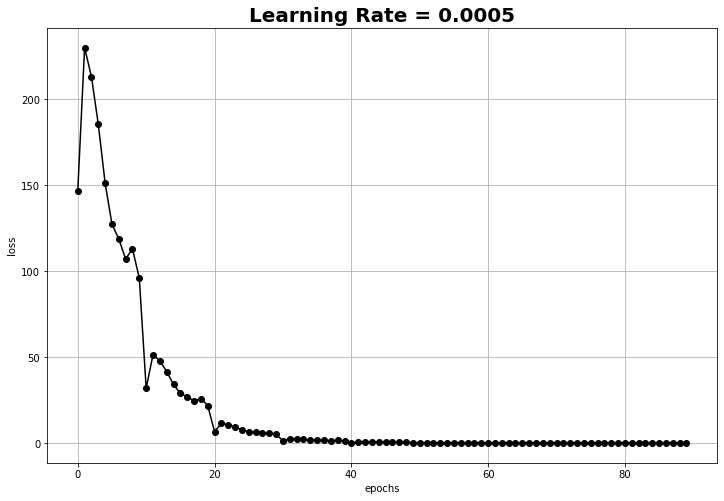

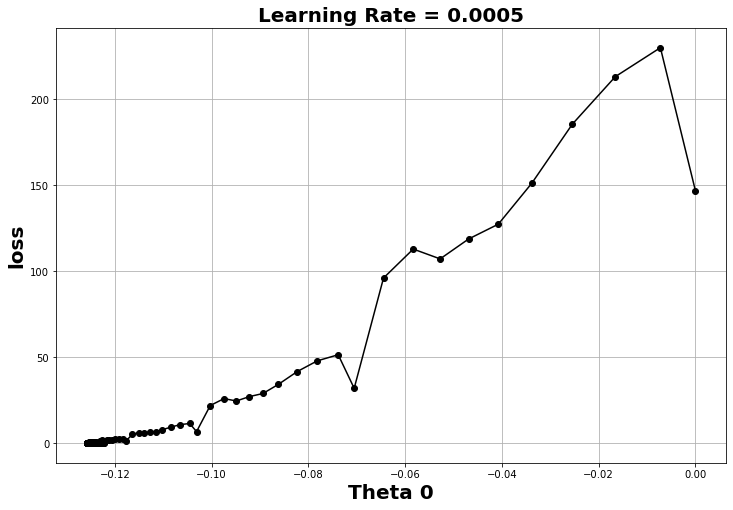

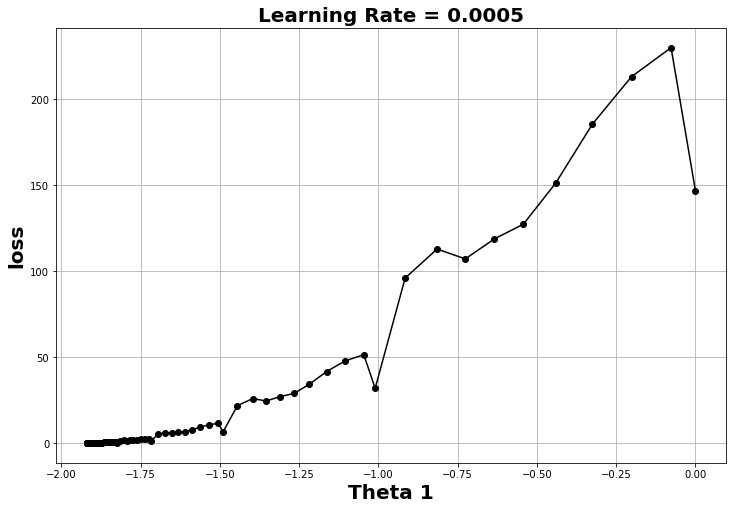

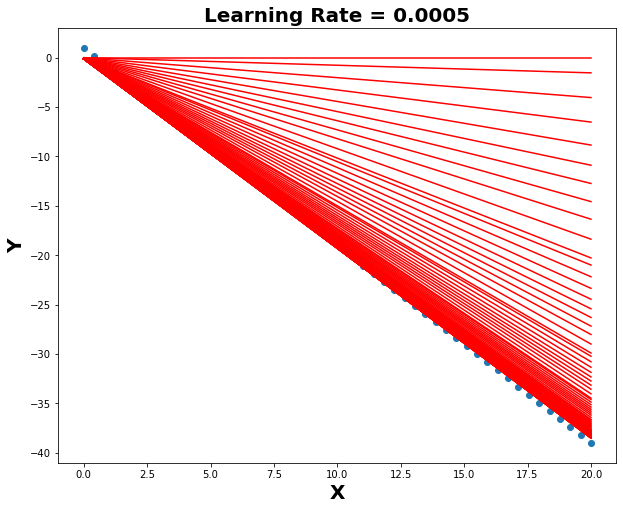

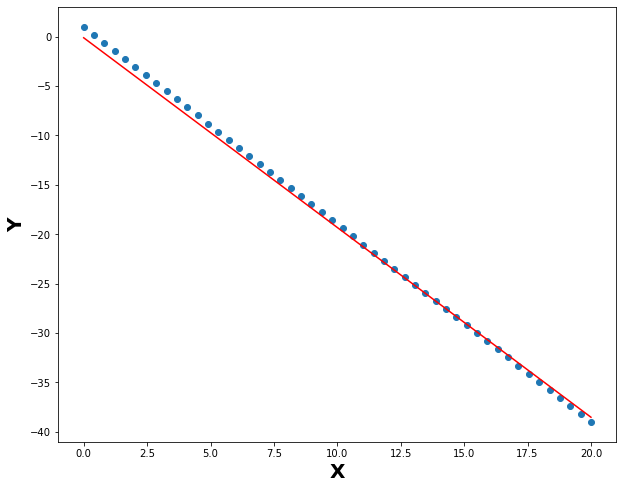

In [127]:
plt.figure(figsize=(12,8))
plt.title('Learning Rate = 0.0005', fontweight='bold',fontsize=20)
plt.grid()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(loss_matMini,'o-',color="black")

plt.figure(figsize=(12,8))
plt.title('Learning Rate = 0.0005', fontweight='bold',fontsize=20)
plt.grid()
plt.xlabel("Theta 0", fontweight='bold',fontsize=20)
plt.ylabel("loss", fontweight='bold',fontsize=20)
plt.plot(thetaMini[0,:],loss_matMini,'o-',color="black")

plt.figure(figsize=(12,8))
plt.title('Learning Rate = 0.0005', fontweight='bold',fontsize=20)
plt.grid()
plt.xlabel("Theta 1", fontweight='bold',fontsize=20)
plt.ylabel("loss", fontweight='bold',fontsize=20)
plt.plot(thetaMini[1,:],loss_matMini,'o-',color="black")

plt.figure(figsize=(10,8))
plt.plot(X[:,1],y,'o')
plt.xlabel("X", fontweight='bold',fontsize=20)
plt.ylabel("Y", fontweight='bold',fontsize=20)
for i in range(thetaMini.shape[1]):
    plt.plot(X[:,1],X@thetaMini[:,i],color='red')
    
plt.title('Learning Rate = 0.0005', fontweight='bold',fontsize=20)    
plt.figure(figsize=(10,8))
plt.xlabel("X", fontweight='bold',fontsize=20)
plt.ylabel("Y", fontweight='bold',fontsize=20)
plt.plot(X[:,1],y,'o')
plt.plot(X[:,1],X@thetaMini[:,-1],color='red')


##### The following results uses batch size=10, alpha = 0.0005 and max. iterations = 300.

In [128]:
thetaMini,loss_matMini = miniGD(X,y,10,alpha = 0.0005,max_iter=300,grad_norm_min=0.001)

****************** epoch 0 ********************

loss = 249.88775510204087

gradiant vector = [[ 19.       ]
 [259.3877551]]

gradiant vector norm = 260.08269357432516

theta : [[0.]
 [0.]]

****************** epoch 1 ********************

loss = 112.67417306056548

gradiant vector = [[ 12.65762726]
 [174.11267993]]

gradiant vector norm = 174.57216513480046

theta : [[-0.04404308]
 [-0.62983297]]

****************** epoch 2 ********************

loss = 50.81379731907432

gradiant vector = [[  8.39706266]
 [116.82739264]]

gradiant vector norm = 117.12877670690835

theta : [[-0.07341695]
 [-1.05295204]]

****************** epoch 3 ********************

loss = 22.93852323634932

gradiant vector = [[ 5.53499741]
 [78.3448472 ]]

gradiant vector norm = 78.54012528308179

theta : [[-0.09293659]
 [-1.3372066 ]]

****************** epoch 4 ********************

loss = 10.386471822030087

gradiant vector = [[ 3.61240414]
 [52.49344788]]

gradiant vector norm = 52.61759718811361

theta : [[-0.

In [129]:
r2_score(y,X@thetaMini[:,-1])

0.9976481502106465

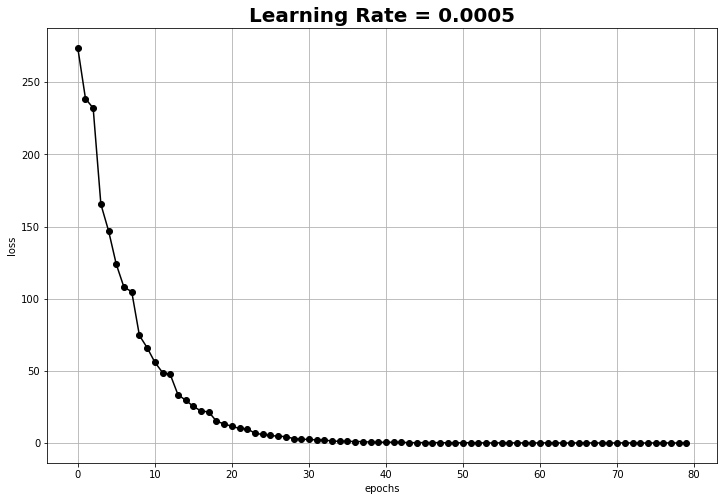

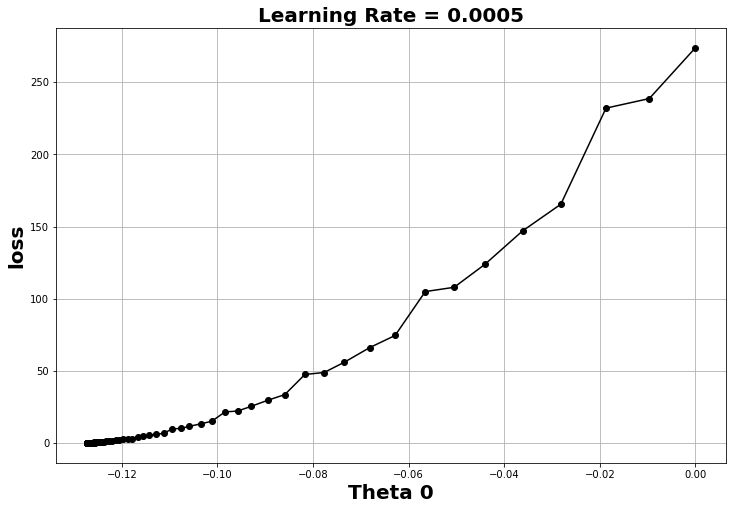

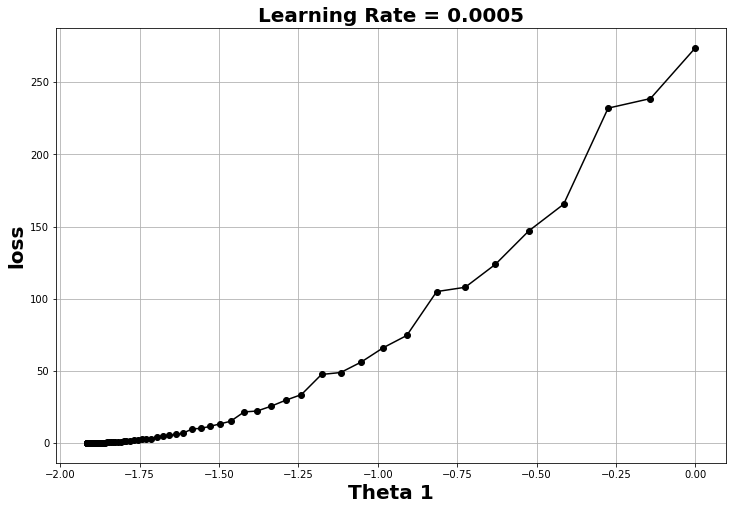

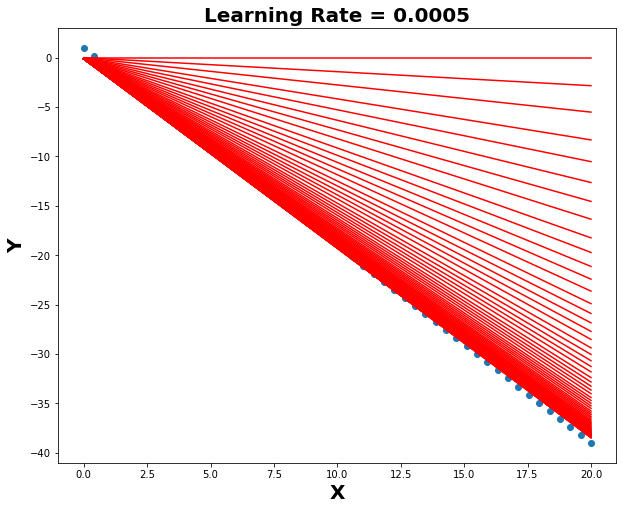

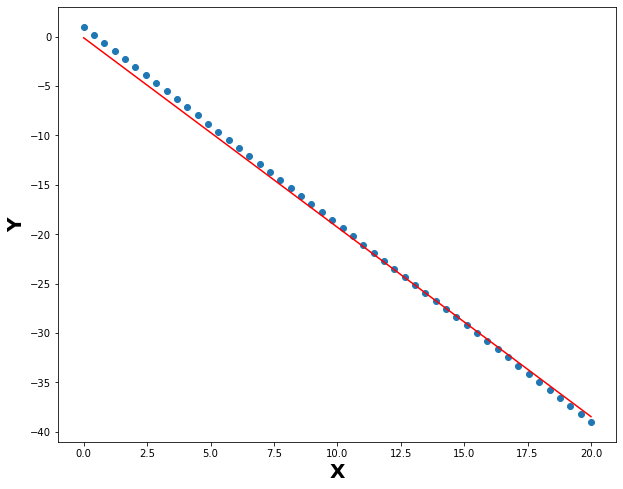

In [131]:
plt.figure(figsize=(12,8))
plt.title('Learning Rate = 0.0005', fontweight='bold',fontsize=20)
plt.grid()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(loss_matMini,'o-',color="black")

plt.figure(figsize=(12,8))
plt.title('Learning Rate = 0.0005', fontweight='bold',fontsize=20)
plt.grid()
plt.xlabel("Theta 0", fontweight='bold',fontsize=20)
plt.ylabel("loss", fontweight='bold',fontsize=20)
plt.plot(thetaMini[0,:],loss_matMini,'o-',color="black")

plt.figure(figsize=(12,8))
plt.title('Learning Rate = 0.0005', fontweight='bold',fontsize=20)
plt.grid()
plt.xlabel("Theta 1", fontweight='bold',fontsize=20)
plt.ylabel("loss", fontweight='bold',fontsize=20)
plt.plot(thetaMini[1,:],loss_matMini,'o-',color="black")

plt.figure(figsize=(10,8))
plt.plot(X[:,1],y,'o')
plt.xlabel("X", fontweight='bold',fontsize=20)
plt.ylabel("Y", fontweight='bold',fontsize=20)
for i in range(thetaMini.shape[1]):
    plt.plot(X[:,1],X@thetaMini[:,i],color='red')
    
plt.title('Learning Rate = 0.0005', fontweight='bold',fontsize=20)    
plt.figure(figsize=(10,8))
plt.xlabel("X", fontweight='bold',fontsize=20)
plt.ylabel("Y", fontweight='bold',fontsize=20)
plt.plot(X[:,1],y,'o')
plt.plot(X[:,1],X@thetaMini[:,-1],color='red')


##### The following results uses batch size=20, alpha = 0.0005 and max. iterations = 300.

In [132]:
thetaMini,loss_matMini = miniGD(X,y,20,alpha = 0.0005,max_iter=300,grad_norm_min=0.001)

****************** epoch 0 ********************

loss = 249.88775510204087

gradiant vector = [[ 19.       ]
 [259.3877551]]

gradiant vector norm = 260.08269357432505

theta : [[0.]
 [0.]]

****************** epoch 1 ********************

loss = 186.8786885887863

gradiant vector = [[ 16.38981952]
 [224.29197589]]

gradiant vector norm = 224.8900100804532

theta : [[-0.01779962]
 [-0.25923809]]

****************** epoch 2 ********************

loss = 139.7509088341681

gradiant vector = [[ 14.13196951]
 [193.93336878]]

gradiant vector norm = 194.4475869985596

theta : [[-0.03314818]
 [-0.48348823]]

****************** epoch 3 ********************

loss = 104.50386248405513

gradiant vector = [[ 12.17889324]
 [167.67252146]]

gradiant vector norm = 168.11424655483657

theta : [[-0.04637653]
 [-0.67747302]]

****************** epoch 4 ********************

loss = 78.14444007123515

gradiant vector = [[ 10.48945307]
 [144.956328  ]]

gradiant vector norm = 145.33535582065136

theta : [[

In [133]:
r2_score(y,X@thetaMini[:,-1])

0.9976564016345681

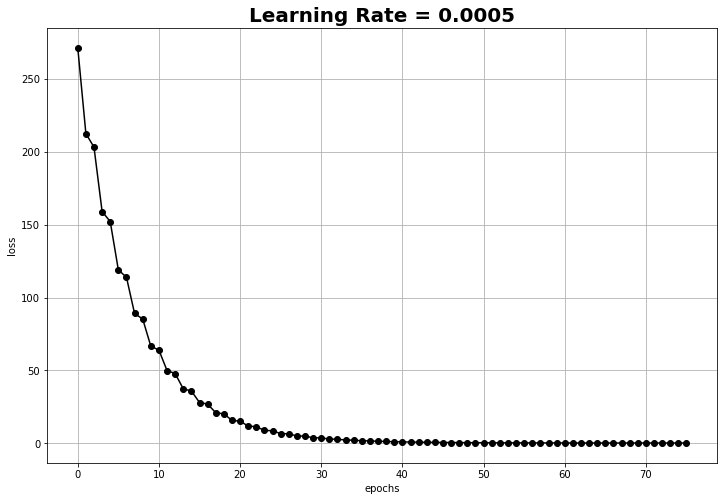

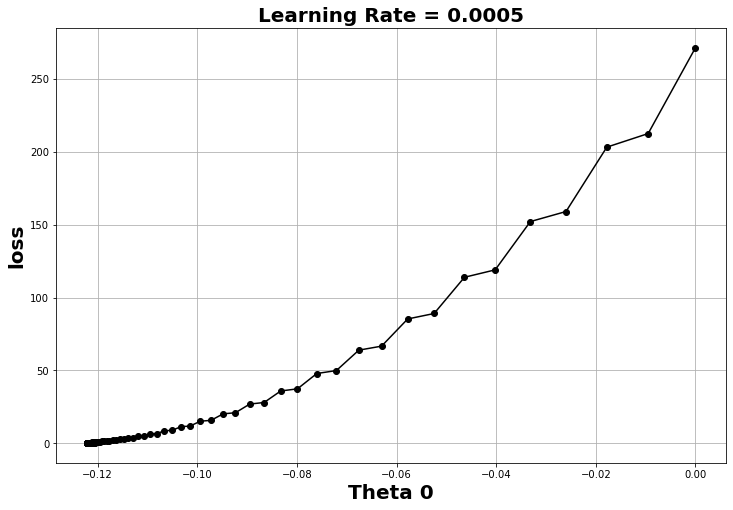

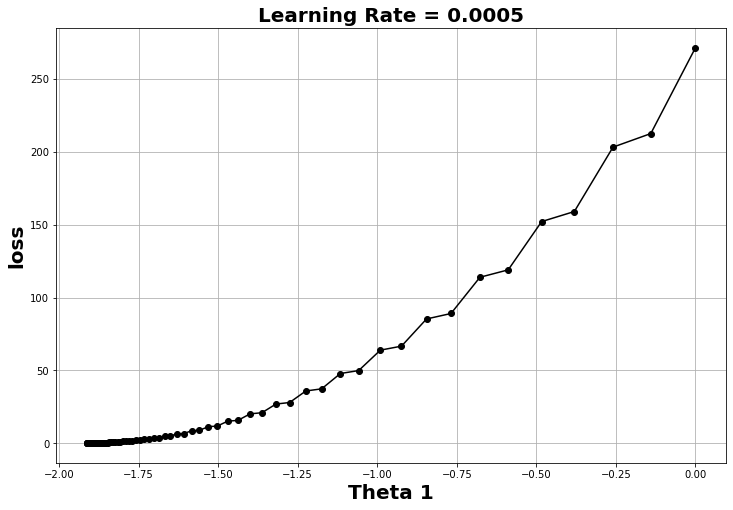

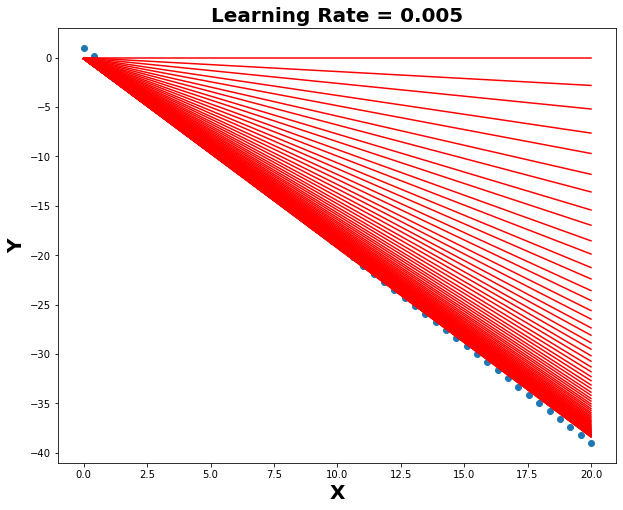

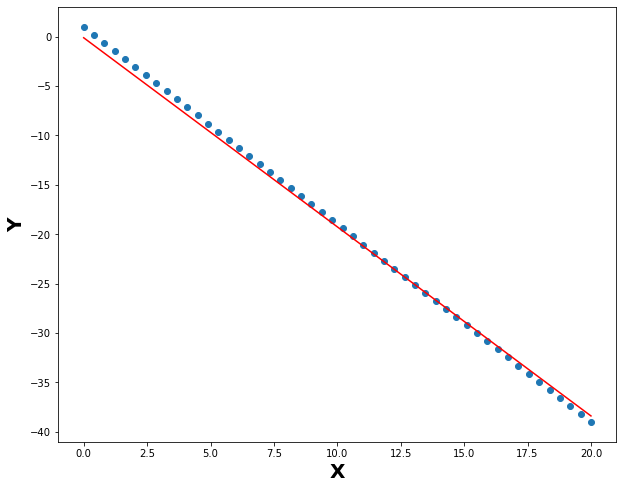

In [134]:
plt.figure(figsize=(12,8))
plt.title('Learning Rate = 0.0005', fontweight='bold',fontsize=20)
plt.grid()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(loss_matMini,'o-',color="black")

plt.figure(figsize=(12,8))
plt.title('Learning Rate = 0.0005', fontweight='bold',fontsize=20)
plt.grid()
plt.xlabel("Theta 0", fontweight='bold',fontsize=20)
plt.ylabel("loss", fontweight='bold',fontsize=20)
plt.plot(thetaMini[0,:],loss_matMini,'o-',color="black")

plt.figure(figsize=(12,8))
plt.title('Learning Rate = 0.0005', fontweight='bold',fontsize=20)
plt.grid()
plt.xlabel("Theta 1", fontweight='bold',fontsize=20)
plt.ylabel("loss", fontweight='bold',fontsize=20)
plt.plot(thetaMini[1,:],loss_matMini,'o-',color="black")

plt.figure(figsize=(10,8))
plt.plot(X[:,1],y,'o')
plt.xlabel("X", fontweight='bold',fontsize=20)
plt.ylabel("Y", fontweight='bold',fontsize=20)
for i in range(thetaMini.shape[1]):
    plt.plot(X[:,1],X@thetaMini[:,i],color='red')
    
plt.title('Learning Rate = 0.005', fontweight='bold',fontsize=20)    
plt.figure(figsize=(10,8))
plt.xlabel("X", fontweight='bold',fontsize=20)
plt.ylabel("Y", fontweight='bold',fontsize=20)
plt.plot(X[:,1],y,'o')
plt.plot(X[:,1],X@thetaMini[:,-1],color='red')
